# MCMC: Random walk metropolis hasting algorithm
## Author
- **Name**: Azimov Sherkhon Azizkhon Ugli
- **Email**: sherkhonazim@gmail.com
- **GitHub**: @AzimovSherkhon
  
Purpose: Generates candidate samples for EnKF and PF as an initial samples \
Parameters:\
κ=0.5 (Low Noise Strength),\
M=10,000 (Number of Samples),\

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x_coords):
    return np.exp(-2 * x_coords**2 * (x_coords**2 - 2) / kappa**2)

def metropolis_hastings(target, num_samples, proposal_std):
    samples = [0]
    current_sample = samples[-1]
    for _ in range(num_samples - 1):
        proposed_sample = current_sample + np.random.normal(0, proposal_std)
        acceptance_ratio = target(proposed_sample) / target(current_sample)
        samples.append(proposed_sample if np.random.rand() < acceptance_ratio else current_sample)
        current_sample = samples[-1]
    return np.array(samples)

In [2]:
kappa = 0.5
num_samples = 10000
proposal_std = 1.0
samples = metropolis_hastings(target_distribution, num_samples, proposal_std)

domain_length = 2.0
num_points = 1024
x_coords = np.linspace(-domain_length, domain_length, num_points)
spatial_step = x_coords[1] - x_coords[0]
target_pdf = target_distribution(x_coords) / np.sum(target_distribution(x_coords) * spatial_step)

In [3]:
print(samples.shape)
np.save("samples10000.npy", samples)

(10000,)


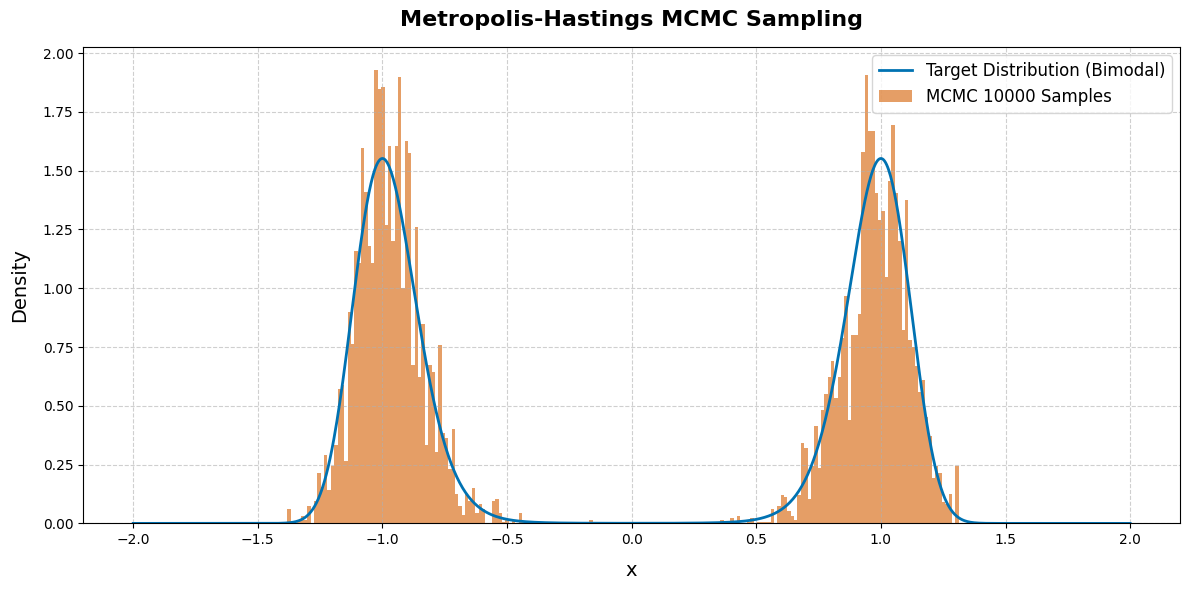

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(x_coords, target_pdf, label="Target Distribution (Bimodal)", color="#0072B2", linewidth=2)
plt.hist(samples, bins=200, density=True, alpha=0.6, color="#D55E00", label="MCMC 10000 Samples")

plt.xlabel("x", fontsize=14, labelpad=10)
plt.ylabel("Density", fontsize=14, labelpad=10)
plt.title("Metropolis-Hastings MCMC Sampling", fontsize=16, fontweight="bold", pad=15)
plt.legend(fontsize=12, loc="upper right", frameon=True)
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("mcmc_sampling_10,000_0.5.png", dpi=300, bbox_inches="tight")
plt.show()